### Import Library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

### Fico Score Range

![Alt Text](https://raw.githubusercontent.com/imamfirdaus-if/kasbaik/main/machine-learning/assets/fico-score-range.png?token=GHSAT0AAAAAABSMKRBWASVLL4H5HL6D4YNIYVIEBGQ)

### Variables

**Usia** : 21 s/d 100
 - 1 : >64
 - 2 : 21 - 64

**Econ**  
 - 5 : econ >= 200000
 - 4 : 1500000 <=  econ < 1999999
 - 3 : 1000000 <= econ < 1499999
 - 2 : 500000 <=  econ < 999999
 - 1 : 10000 <=  econ  < 499999
 - 0 : econ <= 10000
 
**Pekerjaan** 
 - 1 : Wirausaha/ Pedagang/ Pekerja Lepas
 - 2 : Buruh/Guru/Dosen

**Peminjaman ke-** 
 - 1 : 1 
 - 2 : 2- 3 
 - 3 : > 3
 
**Hari telat bayar** 
 - 0 : tidak pernah 
 - 1 : < 1 minggu 
 - 2 : 2 - 4 minggu 
 - 3 : > 4 minggu
 
**Pernah Donasi** 
 - 0 : tidak pernah 
 - 1 : 1 - 3
 - 2 : 3- 5
 - 3 : >= 6

### Open Dataset

In [4]:
with open("./dataset credit-scoring/Dummy Datasets FICO Scoring - V41 - Final.csv", 'r') as csvfile:
    print(f"First line (header) looks like this:\n\n{csvfile.readline()}")
    print(f"Each data point looks like this:\n\n{csvfile.readline()}")

First line (header) looks like this:

,usia,econ,pekerjaan,pinjaman ke,telat bayar,donasi,score

Each data point looks like this:

0,2.0,5.0,2.0,3.0,0.0,3.0,849.969



In [5]:
data  = pd.read_csv(r'./dataset credit-scoring/Dummy Datasets FICO Scoring - V41 - Final.csv', delimiter=',')
data = data.drop(columns=['Unnamed: 0'])
data.head()

,usia,econ,pekerjaan,pinjaman ke,telat bayar,donasi,score
0,2.0,5.0,2.0,3.0,0.0,3.0,849.969
1,1.0,0.0,1.0,1.0,3.0,0.0,100.003
2,1.0,0.0,1.0,2.0,2.0,3.0,316.916
3,2.0,5.0,1.0,2.0,1.0,2.0,654.286
4,2.0,5.0,2.0,2.0,2.0,1.0,656.936


## Data Preprocessing

### Splitting labels and features

In [6]:
features = data.drop(columns=['score'])
label = data[['score']]

print(features.shape)
print(label.shape)

features.columns, label.columns

(10000, 6)
(10000, 1)


(Index(['usia', 'econ', 'pekerjaan', 'pinjaman ke', 'telat bayar', 'donasi'], dtype='object'),
 Index(['score'], dtype='object'))

### Check Data Type
Customize the data type according to the given metadata

- **Categorical** (age, profession, loan number, late payment, donation)
- **Numeric** (loan amount, tenor, income, dependents)

In [7]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


In [8]:
col_cat_label = ['score']
label[col_cat_label] = label[col_cat_label].astype('int64')
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   score   10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


C:\Users\farid\AppData\Local\Temp\ipykernel_7556\3633695273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[col_cat_label] = label[col_cat_label].astype('int64')


In [9]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   usia         10000 non-null  float64
 1   econ         10000 non-null  float64
 2   pekerjaan    10000 non-null  float64
 3   pinjaman ke  10000 non-null  float64
 4   telat bayar  10000 non-null  float64
 5   donasi       10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


In [10]:
col_cat_features = ['usia' , 'econ' , 'pekerjaan' , 'pinjaman ke' , 'telat bayar' , 'donasi' ]

features[col_cat_features] = features[col_cat_features].astype('int64')
features[col_cat_features] = features[col_cat_features].astype('category')

### Normalize Data

In [11]:
mx = MinMaxScaler()

col_features = ['usia' , 'econ' , 'pekerjaan' , 'pinjaman ke' , 'telat bayar' , 'donasi' ]

features[col_features] = mx.fit_transform(features[col_features])
features.head(5)

,usia,econ,pekerjaan,pinjaman ke,telat bayar,donasi
0,1.0,1.0,1.0,1.0,0.000000,1.000000
1,0.0,0.0,0.0,0.0,1.000000,0.000000
2,0.0,0.0,0.0,0.5,0.666667,1.000000
3,1.0,1.0,0.0,0.5,0.333333,0.666667
4,1.0,1.0,1.0,0.5,0.666667,0.333333


### Split Into Train and Test

In [12]:
X_train, X_validate, y_train, y_validate = train_test_split(
    features, label, test_size=0.3, shuffle=True)

In [13]:
print(X_train.shape)
print(y_train.shape)

print(X_validate.shape)
print(y_validate.shape)

(7000, 6)
(7000, 1)
(3000, 6)
(3000, 1)


In [14]:
X_train = np.array(X_train, dtype='float32')
X_validate = np.array(X_validate, dtype='float32')

y_train = np.array(y_train, dtype='float32')
y_validate = np.array(y_validate, dtype='float32')

## Create TF Model

In [15]:
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(units=1, input_shape=[6], activation='linear'),
    tf.keras.layers.Dense(10, activation="linear", input_shape=X_train[0].shape),
    tf.keras.layers.Dense(1),
    ])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
            loss = tf.keras.losses.MeanAbsoluteError(),
            metrics=['mae'])

In [16]:
mc = ModelCheckpoint('Credit Scoring - V4.h5', monitor='val_mae', mode='min', verbose=1, save_best_only=True)

# Train the model
history = model.fit(X_train, 
                y_train, 
                epochs=100,
                callbacks = [mc],
                validation_data=(X_validate, y_validate))

Epoch 1/100
194/219 [=========================>....] - ETA: 0s - loss: 515.1480 - mae: 515.1480
Epoch 1: val_mae improved from inf to 508.18900, saving model to Credit Scoring - V4.h5
219/219 [==============================] - 1s 3ms/step - loss: 515.3813 - mae: 515.3813 - val_loss: 508.1890 - val_mae: 508.1890
Epoch 2/100
196/219 [=========================>....] - ETA: 0s - loss: 505.4553 - mae: 505.4553
Epoch 2: val_mae improved from 508.18900 to 492.70413, saving model to Credit Scoring - V4.h5
219/219 [==============================] - 1s 2ms/step - loss: 505.1007 - mae: 505.1007 - val_loss: 492.7041 - val_mae: 492.7041
Epoch 3/100
202/219 [==========================>...] - ETA: 0s - loss: 486.3912 - mae: 486.3912
Epoch 3: val_mae improved from 492.70413 to 466.72925, saving model to Credit Scoring - V4.h5
219/219 [==============================] - 1s 2ms/step - loss: 484.1716 - mae: 484.1716 - val_loss: 466.7292 - val_mae: 466.7292
Epoch 4/100
204/219 [==========================>.

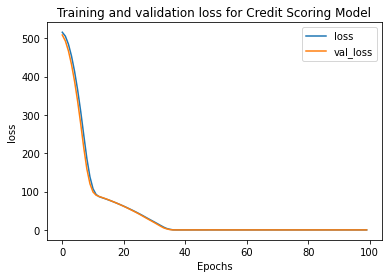

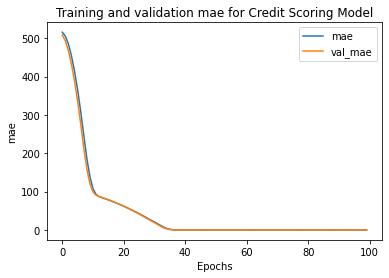

In [17]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.title(f'Training and validation {metric} for Credit Scoring Model')
    plt.show()
    
plot_graphs(history, "loss")
plot_graphs(history, "mae")

In [18]:
final_model = tf.keras.models.load_model('./Credit Scoring - V4.h5')
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


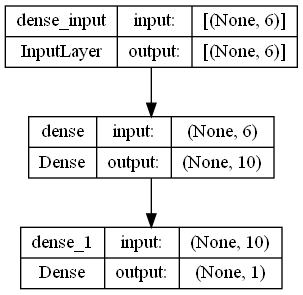

In [19]:
tf.keras.utils.plot_model(final_model, show_shapes=True)

In [20]:
y_vld = pd.DataFrame(y_validate, columns = ['y_vld'])
y_pred = pd.DataFrame(final_model.predict(X_validate), columns = ['y_pred'])

print(type(y_vld))
print(type(y_pred))

94/94 [==============================] - 0s 1ms/step
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [21]:
y_pred.describe()

,y_pred
count,3000.000000
mean,514.089417
std,152.026855
min,99.567513
25%,396.175842
50%,535.447449
75%,632.590561
max,849.469604


In [22]:
print(y_validate)
print(y_pred)

[[703.]
 [182.]
 [319.]
 ...
 [788.]
 [635.]
 [345.]]
          y_pred
0     703.293030
1     181.964722
2     319.124084
3     388.724518
4     181.964722
...          ...
2995  295.266418
2996  679.373840
2997  788.371643
2998  635.227295
2999  344.758331

[3000 rows x 1 columns]


In [23]:
yv = y_vld.reset_index()
yvv = yv.reset_index()
print(yvv)

yp = y_pred.reset_index()
print(yp)

      level_0  index  y_vld
0           0      0  703.0
1           1      1  182.0
2           2      2  319.0
3           3      3  389.0
4           4      4  182.0
...       ...    ...    ...
2995     2995   2995  295.0
2996     2996   2996  679.0
2997     2997   2997  788.0
2998     2998   2998  635.0
2999     2999   2999  345.0

[3000 rows x 3 columns]
      index      y_pred
0         0  703.293030
1         1  181.964722
2         2  319.124084
3         3  388.724518
4         4  181.964722
...     ...         ...
2995   2995  295.266418
2996   2996  679.373840
2997   2997  788.371643
2998   2998  635.227295
2999   2999  344.758331

[3000 rows x 2 columns]


<AxesSubplot:xlabel='index', ylabel='y_pred'>

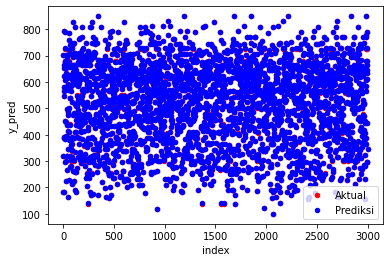

In [24]:
ax = yvv.plot(kind='scatter',x='level_0', y='y_vld',
                                           color='Red', label='Aktual')
yp.plot(kind='scatter', x='index', y='y_pred',
                                          color='Blue', label='Prediksi', ax=ax)

In [25]:
y_val = y_vld['y_vld'].to_list()
y_pred = y_pred['y_pred'].to_list()

In [26]:
list_y = pd.DataFrame(np.column_stack([y_vld, y_pred]), 
                               columns=['y_val', 'y_pred'])

<AxesSubplot:>

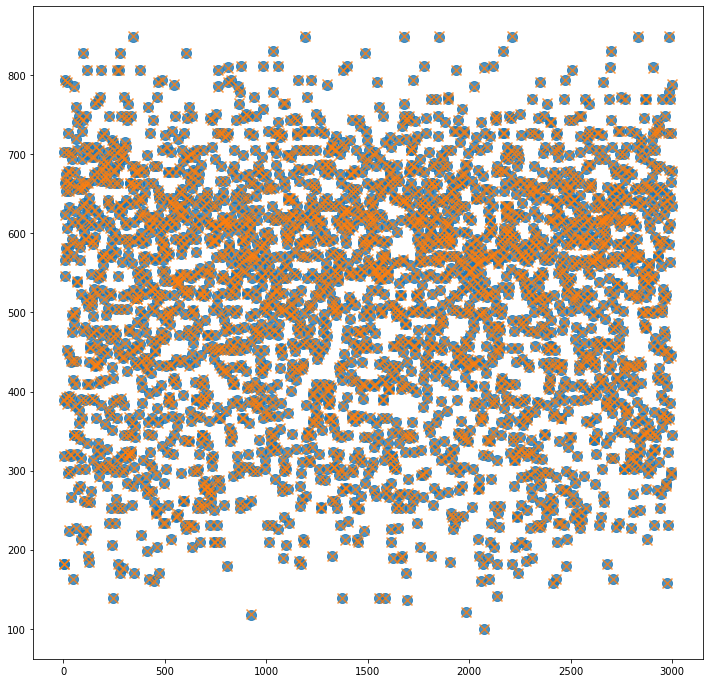

In [27]:
df1 = [2.5, 2.5, 2, 3, 4, 3.5]
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(ax=ax, x=df1)

index = list(range(1,3001))

# sns scatter, with regression fit turned off
sns.regplot(x=np.array(index), y=np.array(list_y['y_val']), scatter=True, fit_reg=False, marker='o',
            scatter_kws={"s": 100})  # the "s" key in `scatter_kws` modifies the size of the marker
# sns scatter, with regression fit turned off
sns.regplot(x=np.array(index), y=np.array(list_y['y_pred']), scatter=True, fit_reg=False, marker='x',
            scatter_kws={"s": 100})  # the "s" key in `scatter_kws` modifies the size of the marker

### Check Ouput Prediction

In [28]:
y_pred_features = final_model.predict(features)
print('max value: ', max(y_pred_features))
print('min value: ', min(y_pred_features))

313/313 [==============================] - 1s 2ms/step
max value:  [849.4696]
min value:  [99.56751]


## Convert Model .h5 to TFLite

In [29]:
final_model = tf.keras.models.load_model('./Credit Scoring - V4.h5')

# Check its architecture
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [30]:
from keras.models import load_model
saved_model = load_model('Credit Scoring - V4.h5')
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = saved_model.evaluate(X_validate, y_validate, verbose=0)
print('Train Mae: %.3f, Valid Mae: %.3f' % (train_acc, valid_acc))

Train Mae: 0.256, Valid Mae: 0.252


In [31]:
fm = final_model.predict(features)
fm

313/313 [==============================] - 1s 1ms/step


array([[849.4696 ],
       [ 99.56751],
       [316.47388],
       ...,
       [714.8992 ],
       [806.94543],
       [385.98163]], dtype=float32)

In [32]:
CREDIT_SCORE_SAVED_MODEL = "exp Credit Scoring - V4"

In [33]:
tf.saved_model.save(final_model, CREDIT_SCORE_SAVED_MODEL)

INFO:tensorflow:Assets written to: exp Credit Scoring - V4\assets


In [34]:
loaded = tf.saved_model.load(CREDIT_SCORE_SAVED_MODEL)

In [35]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'dense_input': TensorSpec(shape=(None, 6), dtype=tf.float32, name='dense_input')})
{'dense_1': TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_1')}


In [36]:
converter = tf.lite.TFLiteConverter.from_saved_model(CREDIT_SCORE_SAVED_MODEL)

converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [37]:
tflite_model = converter.convert()
tflite_model_file = 'Credit Scoring - V4.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

## Load & Test TFLite model

Load TensorFlow lite model with interpreter interface.

In [44]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="Credit Scoring - V4.tflite")
# interpreter = tf.lite.Interpreter(model_path="regression.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
input_details

[{'name': 'serving_default_dense_input:0',
  'index': 0,
  'shape': array([1, 6]),
  'shape_signature': array([-1,  6]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [45]:
output_details = interpreter.get_output_details()
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 5,
  'shape': array([1, 1]),
  'shape_signature': array([-1,  1]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [46]:
np_res_im = np.array(X_validate[0])
np_res_im = (np_res_im).astype('float32')
np_res_im

array([0.        , 0.8       , 1.        , 0.        , 0.33333334,
       0.33333334], dtype=float32)

In [47]:
print(input_details[0]['shape'])
print(np_res_im.shape)

[1 6]
(6,)


In [48]:
if len(np_res_im.shape) == 1:
    np_res_im = np.expand_dims(np_res_im, 0)
# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np_res_im
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])

In [49]:
print(np_res_im.shape)
print(output_data.shape)

(1, 6)
(1, 1)


In [50]:
predictions = final_model.predict(X_validate)
print('input value: ' + str(X_validate[0]))
print('prediction from model.h5: ' + str(predictions[0]))
print('prediction from model.tflite: ' + str(output_data))

94/94 [==============================] - 0s 2ms/step
input value: [0.         0.8        1.         0.         0.33333334 0.33333334]
prediction from model.h5: [518.5033]
prediction from model.tflite: [[518.60657]]
